In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Desktop\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
TARGET_COL = "target"

In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
df["thal"] = df["thal"].apply(lambda x: x if x != " " else "0")

In [9]:
df["thal"] = df["thal"].astype(np.float64)

In [10]:
CAT_COLS = [
   'thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex'
]

In [11]:
REAL_COLS = ['oldpeak','age', 'trestbps','chol','thalach',]

C:\Users\User\miniconda3\envs\mlisuct\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\mlisuct\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\mlisuct\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

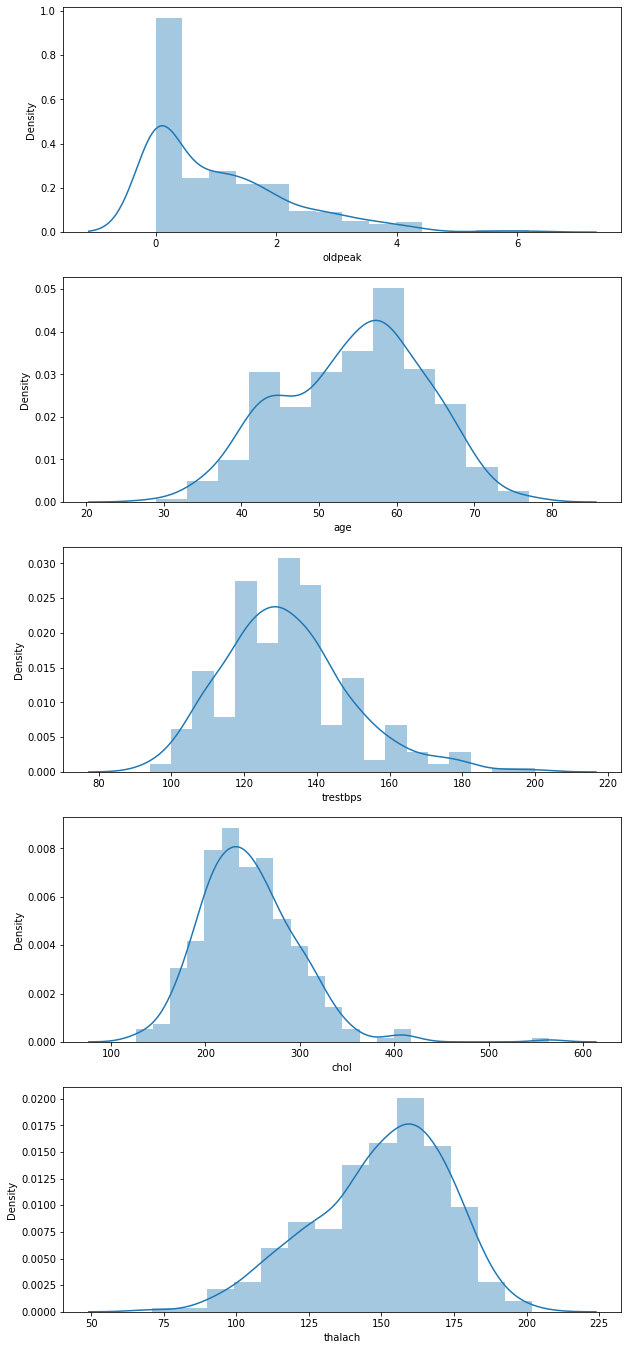

In [12]:
fig, ax = plt.subplots(5);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(REAL_COLS):
    sns.distplot(df[col], ax=ax[i])

In [13]:
len(CAT_COLS)

8

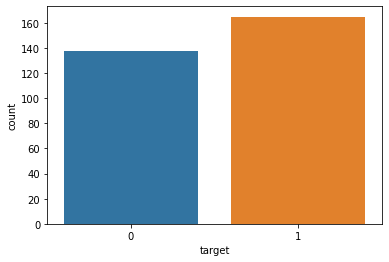

In [14]:
sns.countplot(x=TARGET_COL, data=df);

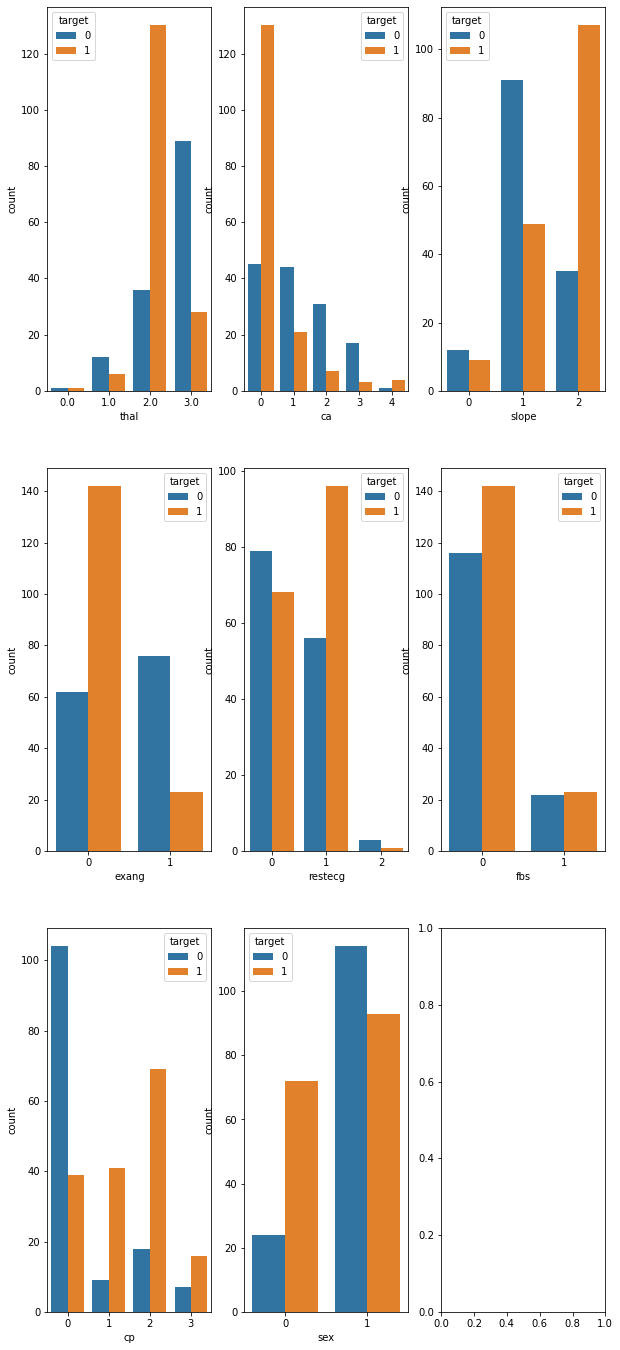

In [15]:
fig, ax = plt.subplots(3, 3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(CAT_COLS):
    row_id  = i // 3
    col_id = i % 3
    sns.countplot(x=col, hue=TARGET_COL, data=df, ax=ax[row_id, col_id])

In [16]:
df["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [17]:
condition = df["cp"] == 0

In [18]:
data_size = df.shape[0]

In [19]:
df["target"].value_counts() / data_size

1    0.544554
0    0.455446
Name: target, dtype: float64

In [20]:
condition_size = df.loc[condition].shape[0]
no_condition_size = df.loc[~condition].shape[0]

In [21]:
df.loc[condition, "target"].value_counts() / condition_size

0    0.727273
1    0.272727
Name: target, dtype: float64

In [22]:
df.loc[~condition, "target"].value_counts() / no_condition_size

1    0.7875
0    0.2125
Name: target, dtype: float64

In [23]:
cp = df.loc[condition]

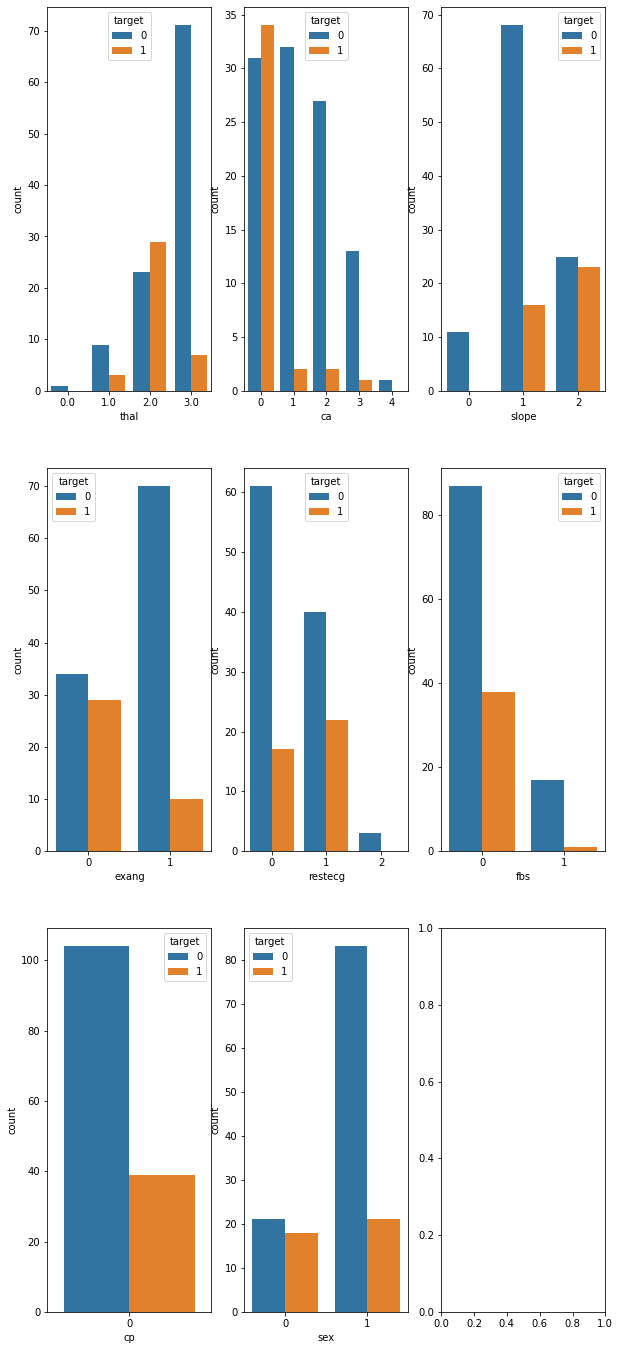

In [24]:
fig, ax = plt.subplots(3, 3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(CAT_COLS):
    row_id  = i // 3
    col_id = i % 3
    sns.countplot(x=col, hue=TARGET_COL, data=cp, ax=ax[row_id, col_id])

In [25]:
no_cp = df.loc[~condition]

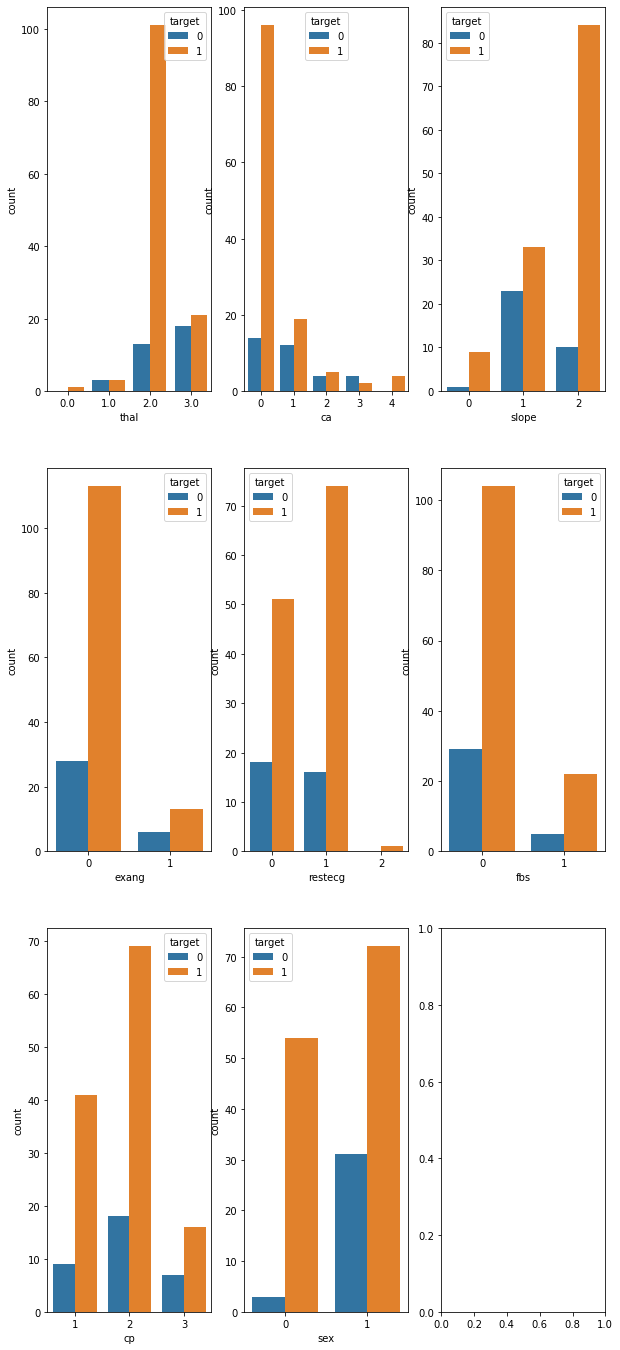

In [26]:
fig, ax = plt.subplots(3, 3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(CAT_COLS):
    row_id  = i // 3
    col_id = i % 3
    sns.countplot(x=col, hue=TARGET_COL, data=no_cp, ax=ax[row_id, col_id])

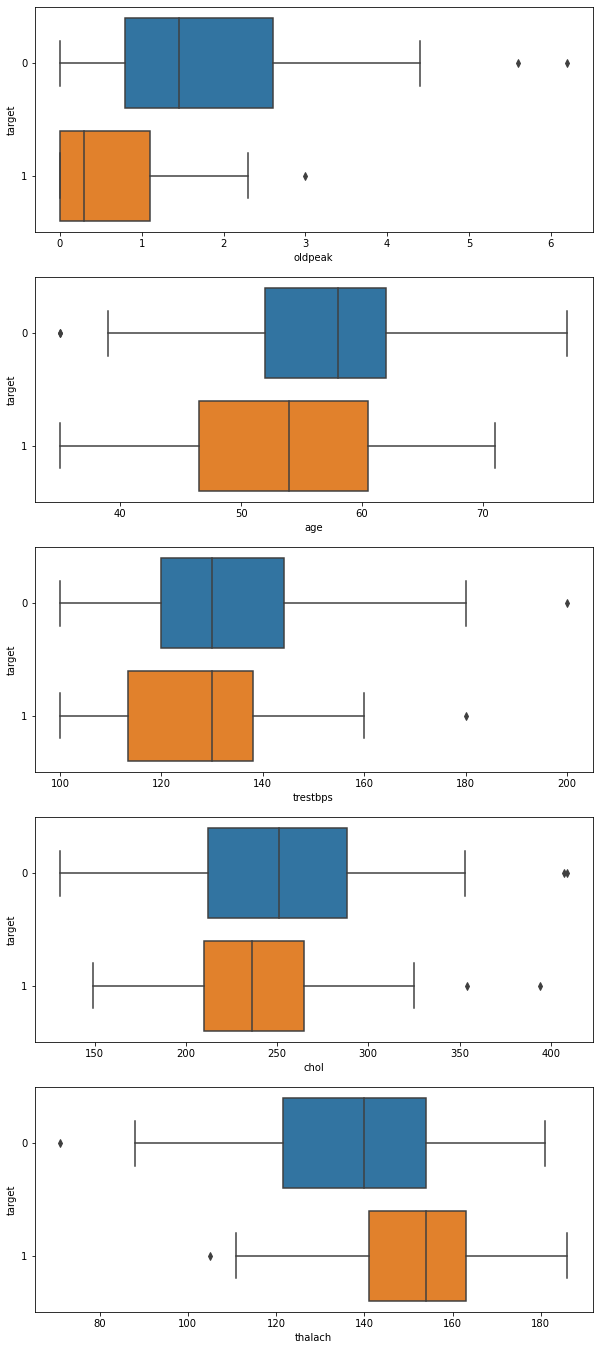

In [27]:
fig, ax = plt.subplots(5);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(REAL_COLS):
    sns.boxplot(x=col, y=TARGET_COL, data=cp, ax=ax[i], orient="h")

In [28]:
condition = cp["oldpeak"] > 1

In [29]:
condition_size = cp.loc[condition].shape[0]
no_condition_size = cp.loc[~condition].shape[0]

In [30]:
cp.loc[condition, "target"].value_counts() / condition_size

0    0.866667
1    0.133333
Name: target, dtype: float64

In [31]:
cp.loc[~condition, "target"].value_counts() / no_condition_size

0    0.573529
1    0.426471
Name: target, dtype: float64

In [32]:
cp["oldpeak_log"] = np.log1p(cp["oldpeak"])

C:\Users\User\AppData\Local\Temp/ipykernel_1556/2385552440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp["oldpeak_log"] = np.log1p(cp["oldpeak"])


<AxesSubplot:xlabel='oldpeak_log', ylabel='target'>

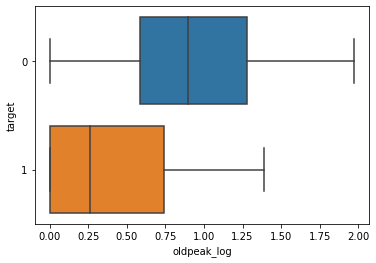

In [33]:
sns.boxplot(x="oldpeak_log", y=TARGET_COL, data=cp, orient="h")

In [34]:
condition = cp["oldpeak_log"] > 0.75

In [35]:
condition_size = cp.loc[condition].shape[0]
no_condition_size = cp.loc[~condition].shape[0]

In [36]:
cp.loc[condition, "target"].value_counts() / condition_size

0    0.866667
1    0.133333
Name: target, dtype: float64

In [37]:
cp.loc[~condition, "target"].value_counts() / no_condition_size

0    0.573529
1    0.426471
Name: target, dtype: float64

In [38]:
cp.loc[condition, "target"].value_counts()

0    65
1    10
Name: target, dtype: int64

In [39]:
cp.loc[condition, "target"].value_counts() / df["target"].value_counts()

0    0.471014
1    0.060606
Name: target, dtype: float64

In [40]:
df["oldpeak_log"] = np.log1p(df["oldpeak"])

In [45]:
df["Prediction"] = 1
df.loc[(df["cp"] == 0) & (df["oldpeak_log"] > 0.75), "Prediction"] = 0

In [46]:
pd.crosstab(df["target"], df["Prediction"])

Prediction,0,1
target,,
0,65,73
1,10,155


In [47]:
df.loc[df["target"] == df["Prediction"]].shape[0] / data_size

0.7260726072607261